In [1]:
import pandas as pd

In [2]:
vb_df=pd.read_excel("Basic wind speed.xlsx",
                    sheet_name="Sheet1",
                    usecols="A:B",)
vb_df.to_csv("Basic wind speed.csv",index=False)

In [3]:
vb_df=pd.read_csv("Basic wind speed.csv")

In [4]:
vb_df=vb_df.set_index("Location")

In [5]:
vb_df

,Vb
Location,
Agra,47
Ahmedabad,39
Ajmer,47
Almora,47
Amritsar,47
...,...
Udaipur,47
Vadodara,44
Varanasi,47


In [6]:
location_list = vb_df.index.tolist()

In [55]:
def basic_wind_speed(location:str):
    """
    Returns the basic wind speed in m/s as per IS 875 Part-3:2015
    """
    vb_df=pd.read_csv("Basic wind speed.csv")
    vb_df=vb_df.set_index("Location")
    location_list = vb_df.index.tolist()
    if (location in location_list):
        vb=vb_df.loc[location,'Vb']
        print (vb)
    else:
        print("Give another location")
    
    
    

In [57]:
basic_wind_speed('Chennai')

50


In [23]:
k2_df=pd.read_excel("Basic wind speed.xlsx",
                    sheet_name="Sheet1",
                    usecols="G:K",nrows=15)
k2_df.to_csv("Terrain factor.csv",index=False)

In [22]:
k2_df=pd.read_csv("Terrain factor.csv")

In [4]:
k2_df=k2_df[:15]

In [24]:
k2_df

,Height,Category 1,Category 2,Category 3,Category 4
0,0,1.05,1.00,0.91,0.80
1,10,1.05,1.00,0.91,0.80
2,15,1.09,1.05,0.97,0.80
3,20,1.12,1.07,1.01,0.80
4,30,1.15,1.12,1.06,0.97
5,50,1.20,1.17,1.12,1.10
6,100,1.26,1.24,1.20,1.20
7,150,1.30,1.28,1.24,1.24
8,200,1.32,1.30,1.27,1.27
9,250,1.34,1.32,1.29,1.28


In [7]:
import math
def terrain_factor(height:int,category:str)->float:
    """
    Returns the terrain roughness and height factor  as per IS 875 Part-3:2015
    """
    k2_df=pd.read_csv("Terrain factor.csv")
    k2_df=k2_df[:15]
    # Adding given height with a NaN value for interpolation, with data types specified
    new_data = pd.DataFrame({'Height': height, category: [None]}, dtype=float)
    k2_df = pd.concat([ k2_df, new_data], ignore_index=True)
    # Sorting the DataFrame by Height to ensure proper interpolation
    k2_df.sort_values('Height', inplace=True)
    # Performing linear interpolation
    k2_df[category] = k2_df[category].interpolate(method='linear')
    # Extracting the interpolated value for given height 
    k2 = k2_df[k2_df['Height'] == height][category].iloc[0]
    return round(k2,3)
    
    
   
   

In [8]:
terrain_factor(height=420,category='Category 3')

1.345

In [23]:
ka_df=pd.read_excel("Basic wind speed.xlsx",
                    sheet_name="Sheet1",
                    usecols="M:N",)
ka_df.to_csv("Area averaging factor.csv",index=False)

In [25]:
ka_df=ka_df[:4]

In [26]:
ka_df

,Tributary Area,Ka
0,0.0,1.0
1,10.0,1.0
2,25.0,0.9
3,100.0,0.8


In [29]:
import math
def area_averaging_factor(tributary_area:float)->float:
    """
    Returns the area_averaging_factor as per IS 875 Part-3:2015
    """
    ka_df=pd.read_csv("Area averaging factor.csv")
    ka_df=ka_df[:4]
    # Adding given tributary area with a NaN value for interpolation, with data types specified
    new_data = pd.DataFrame({'Tributary Area': tributary_area, 'Ka': [None]}, dtype=float)
    ka_df = pd.concat([ ka_df, new_data], ignore_index=True)
    # Sorting the DataFrame by tributary area to ensure proper interpolation
    ka_df.sort_values('Tributary Area', inplace=True)
    # Performing linear interpolation
    ka_df['Ka'] = ka_df['Ka'].interpolate(method='linear')
    # Extracting the interpolated value for given tributary area
    ka = ka_df[ka_df['Tributary Area'] == tributary_area]['Ka'].iloc[0]
    return round(ka,3)

In [30]:
area_averaging_factor(22)

0.95

In [68]:
k4_df=pd.read_excel("Basic wind speed.xlsx",
                    sheet_name="Sheet1",
                    usecols="D:E",)
k4_df.to_csv("Importance factor.csv",index=False)


In [ ]:
k4_df=k4_df[:3]
k4_df=k4_df.set_index("Structure")
k4_df

In [69]:
import pandas as pd
def importance_factor(structure:str):
    """
    Returns the importance_factor as per IS 875 Part-3:2015
    """
    k4_df=pd.read_csv("Importance factor.csv")
    k4_df=k4_df[:3]
    k4_df=k4_df.set_index("Structure")
    k4=k4_df.loc[structure,'k4']
    return k4
    

In [70]:
importance_factor('Important Structures')

1.3

In [41]:
k4_df

,k4
Structure,
Important Structures,1.30
Industrial Structures,1.15
Other Structures,1.00


In [62]:
k4=k4_df.loc['Other Structures','k4']
k4

1.0

In [73]:
kd_df=pd.read_excel("Basic wind speed.xlsx",
                    sheet_name="Sheet1",
                    usecols="P:Q",)
kd_df.to_csv("Wind directionality factor.csv",index=False)

In [74]:
kd_df=kd_df[:5]
kd_df=kd_df.set_index("Structural form")
kd_df

,Kd
Structural form,
Triangular,0.9
Square,0.9
Rectangular,0.9
Circular,1.0
Cyclone affected region,1.0


In [75]:
def wind_directionality_factor(structure:str):
    """
    Returns the wind_directionality_factor as per IS 875 Part-3:2015
    """
    kd_df=pd.read_csv("Wind directionality factor.csv")
    kd_df=kd_df[:5]
    kd_df=kd_df.set_index("Structural form")
    kd=kd_df.loc[structure,'Kd']
    return kd
    

In [76]:
wind_directionality_factor('Triangular')

0.9

In [78]:
k1_df=pd.read_excel("Basic wind speed.xlsx",
                    sheet_name="Sheet1",
                    usecols="S:Y",)
k1_df.to_csv("Risk coefficient factor.csv",index=False)

In [96]:
def basic_wind_speed(location:str,structural_class:str)->tuple[float,float]:
    """
    Returns the basic wind speed in m/s as per IS 875 Part-3:2015
    """
    vb_df=pd.read_csv("Basic wind speed.csv")
    vb_df=vb_df.set_index("Location")
    k1_df=pd.read_csv("Risk coefficient factor.csv")
    k1_df=k1_df[:4]
    k1_df=k1_df.set_index("Structural class")
    location_list = vb_df.index.tolist()
    if (location in location_list):
        vb=vb_df.loc[location,'Vb']
        k1=k1_df.loc[structural_class,str(vb)]

    return vb,k1
        
   
       

In [88]:

k1_df=pd.read_csv("Risk coefficient factor.csv")
k1_df=k1_df[:4]
k1_df=k1_df.set_index("Structural class")
k1_df

,33,39,44,47,50,55
Structural class,,,,,,
General,1.00,1.00,1.00,1.00,1.00,1.00
Temporary structures,0.82,0.76,0.73,0.71,0.70,0.67
Structures with low risk,0.94,0.92,0.91,0.90,0.90,0.89
Important structures,1.05,1.06,1.07,1.07,1.08,1.08


In [99]:
vb=47
k1=k1_df.loc['Temporary structures',str(vb)]


In [100]:
basic_wind_speed(location='Agra',structural_class='Temporary structures')

(47, 0.71)

In [101]:
k1

0.71

In [11]:
import Project.wind_loads as wind_loads

In [117]:
def design_wind_pressure(location:str,structural_class:str,height:int,category:str,slope:float,
                         structure_imp:str,structural_form:str,tributary_area:float,
                        )->tuple[float,float,float,float,float,]:
    """
    To calculate the design_wind_pressure
    """
    vb,k1=wind_loads.basic_wind_speed(location,structural_class)
    k2=wind_loads.terrain_factor(height,category)
    if (slope<3):
        k3=1.0
    else:
        k3=1.36
    k4=wind_loads.importance_factor(structure_imp)
    Vz=vb*k1*k2*k3*k4
    pz=0.6*Vz**2
    Kd=wind_loads.wind_directionality_factor(structural_form)
    Ka=wind_loads.area_averaging_factor(tributary_area)
    Kc=0.9
    pd=Kd*Ka*Kc*pz*10**-3
    return k3,round(Vz,2),round(pz,2),Kc,round(pd,2)

In [118]:
design_wind_pressure(location='Agra',structural_class='Important structures', height=420,category='Category 3',slope=1.0,
                         structure_imp='Important Structures',structural_form='Rectangular',tributary_area=22,)

(1.0, 87.93, 4639.23, 0.9, 3.57)

In [12]:
k3, Vz, pz, Kc, pd=wind_loads.design_wind_pressure(location='Agra',structural_class='Important structures', height=420,category='Category 3',slope=1.0,
                         structure_imp='Important Structures',structural_form='Rectangular',tributary_area=22,)


In [13]:
k3, Vz, pz, Kc, pd

(1.0, 87.93, 4639.23, 0.9, 3247.46)

In [40]:
def design_wind_pressure(location:str,structural_class:str,height:float,category:str,slope:float,
                         structure_imp:str,structural_form:str,tributary_area:float,
                        )->tuple[float,float,float,float,float,]:
    """
    Calculates the design_wind_pressure,pd(kN/m2) as per IS 875 Part-3:2015
    """
    vb,k1=wind_loads.basic_wind_speed(location,structural_class)
    k2=wind_loads.terrain_factor(height,category)
    if (slope<3):
        k3=1.0
    else:
        k3=1.36
    k4=wind_loads.importance_factor(structure_imp)
    Vz=vb*k1*k2*k3*k4
    pz=0.6*(Vz**2)*(10**-3)
    Kd=wind_loads.wind_directionality_factor(structural_form)
    Ka=wind_loads.area_averaging_factor(tributary_area)
    Kc=0.9
    p_des=Kd*Ka*Kc*pz*10**-3
    if (p_des<=(0.7*pz)):
        pd=0.7*pz
    else:
        pd=p_des
    return k3,round(Vz,2),round(pz,2),Kc,round(pd,2)

In [41]:
k3, Vz, pz, Kc, pd=design_wind_pressure(location='Agra',structural_class='Important structures', height=420,category='Category 3',slope=1.0,
                         structure_imp='Important Structures',structural_form='Rectangular',tributary_area=22,)


In [42]:
k3, Vz, pz, Kc, pd

(1.0, 87.93, 4.64, 0.9, 3.25)

In [43]:
def load_calc_force(Cf:float,area:float,pd:float)->float:
    """
    Calculates the wind load,F for the given force coefficients and 
    design wind pressure as per IS 875 Part-3:2015
    """
    
    F=Cf*area*pd
    return round(F,2)

In [46]:
load_calc_force(Cf=1.2,area=20,pd=1.5)

36.0

In [123]:
def load_calc(Cpe:float,Cpi:float,area:float,pd:float)->float:
    """
    Calculates the wind load
    """
    
    F=(Cpe-Cpi)*area*pd
    return F

In [124]:
load_calc(cpe=0.9,cpi=0.1,area=20,pd=3.57)

57.12

In [5]:
k2_df

,Height,Category 1,Category 2,Category 3,Category 4
0,0.0,1.05,1.00,0.91,0.80
1,10.0,1.05,1.00,0.91,0.80
2,15.0,1.09,1.05,0.97,0.80
3,20.0,1.12,1.07,1.01,0.80
4,30.0,1.15,1.12,1.06,0.97
5,50.0,1.20,1.17,1.12,1.10
6,100.0,1.26,1.24,1.20,1.20
7,150.0,1.30,1.28,1.24,1.24
8,200.0,1.32,1.30,1.27,1.27
9,250.0,1.34,1.32,1.29,1.28


In [27]:
import pandas as pd
import numpy as np

height=95 
storey_height=5
category='Category 1'
Vb=47
k1=1
k3=1
k4=1
Kd=1
Ka=1
Kc=0.9

def wind_data_frame(height,storey_height,category,Vb,k1,k3,k4,Kd,Ka,Kc)
heights = np.arange(0, height, storey_height)

# Creating a new dataframe to hold interpolated values
new_df = pd.DataFrame({'Height': heights})

# Interpolating values for 'Category 1'
new_df[category] = np.interp(heights, k2_df['Height'], k2_df[category])

new_df.rename(columns={'Category 1': 'k2'}, inplace=True)
new_df['Vz'] = Vb * k1 * new_df['k2'] * k3 * k4
new_df['pz'] = 0.6 * new_df['Vz'] * new_df['Vz']
new_df['pd'] =Kd*Ka*Kc*new_df['pz']*10**-3

return new_df

,Height,k2,Vz,pz,pd
0,0,1.0500,49.3500,1461.253500,1.315128
1,5,1.0500,49.3500,1461.253500,1.315128
2,10,1.0500,49.3500,1461.253500,1.315128
3,15,1.0900,51.2300,1574.707740,1.417237
4,20,1.1200,52.6400,1662.581760,1.496324
5,25,1.1350,53.3450,1707.413415,1.536672
6,30,1.1500,54.0500,1752.841500,1.577557
7,35,1.1625,54.6375,1791.153844,1.612038
8,40,1.1750,55.2250,1829.880375,1.646892
9,45,1.1875,55.8125,1869.021094,1.682119


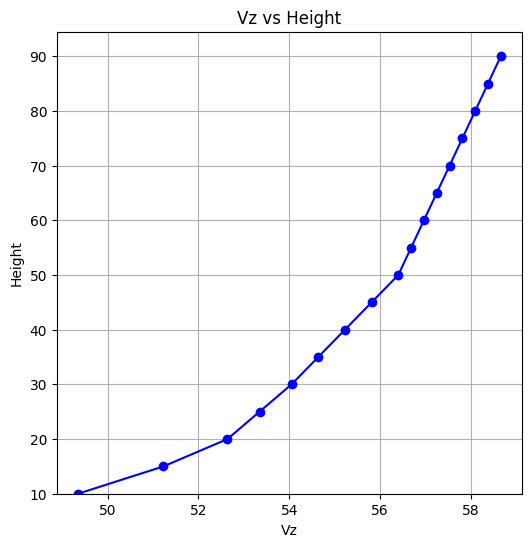

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.plot(new_df['Vz'], new_df['Height'], marker='o', linestyle='-', color='b')
plt.title('Vz vs Height')
plt.xlabel('Vz')
plt.ylabel('Height')
plt.ylim(bottom=10)
plt.grid(True)
plt.show()

In [20]:
beta_df=pd.read_excel("Basic wind speed.xlsx",
                    sheet_name="Sheet2",
                    usecols="A:B",nrows=4)
beta_df.to_csv("Kind of structure.csv",index=False)

In [25]:
def damping_coefficient(structural_kind:str):
    """
    Returns the damping_coefficient for the given kind of structure as per IS 875 Part-3:2015
    """
    beta_df=pd.read_csv("Kind of structure.csv")
    beta_df=beta_df.set_index("Kind of structure")
    beta=beta_df.loc[structural_kind,'beta']
    return beta

In [26]:
damping_coefficient(structural_kind='Welded steel structures')

0.01

In [8]:
import Project.wind_loads as wind_loads
df=wind_loads.wind_data_frame(height=90,storey_height=3,category='Category 1',Vb=47,k1=1,k3=1,k4=1,
                    Kd=1,Ka=1,Kc=0.9,Cf=1.2,area=20)
df

,Height,k2,Vz(m/s),pz(kN/m2),pd(kN/m2),Load(kN)
0,0,1.05,49.35,1.461,1.315,11.688
1,3,1.05,49.35,1.461,1.315,11.688
2,6,1.05,49.35,1.461,1.315,11.688
3,9,1.05,49.35,1.461,1.315,11.688
4,12,1.07,50.29,1.517,1.365,12.136
5,15,1.09,51.23,1.575,1.418,12.600
6,18,1.11,52.17,1.633,1.470,13.064
7,21,1.12,52.64,1.663,1.497,13.304
8,24,1.13,53.11,1.692,1.523,13.536
9,27,1.14,53.58,1.722,1.550,13.776


In [9]:
df[:3]['Height']==[0,3,6]

0    True
1    True
2    True
Name: Height, dtype: bool

In [10]:
df[:3]['Vz(m/s)']==[49.35,49.35,49.35]

0    True
1    True
2    True
Name: Vz(m/s), dtype: bool

In [11]:
df[:3]['pd(kN/m2)']==[1.315,1.315,1.315]

0    True
1    True
2    True
Name: pd(kN/m2), dtype: bool

In [12]:
df[:3]['Load(kN)']==[11.688,11.688,11.688]

0    True
1    True
2    True
Name: Load(kN), dtype: bool

In [ ]:
def dynamic_response_factor(height:float,b:float,d:float,category:str,beta:float,s:float)->float:
    """
    Returns the dynamic_response_factor
    b:dim in major dirn
    d:dim in minor dirn
    s:level considered
    """
    if (category=='Category 4'):
        Lh=70*(height/10)**0.25
    else:
        Lh=85*(height/10)**0.25
    f=(d**0.5)/(0.09*height)
    Bs=1/(1+(((0.26*(height-s)**2))+(0.46*(b**2))**0.5)/Lh)
    Hs=1+((s/h)**2)
    gR=(2*ln(3600*f))**0.5
    if (category=='Category 1' or category=='Category 2'):
        gv=3.0
    else:
        gv=4.0
    Ihi=wind_loads.turbulence_intensity(category,z)
    r=2*Ihi
    Vhd=
    S=1/((1+((3.5*f*h)/Vhd))*(1+((4*f*b)/Vhd)))
    N=(f*Lh)/Vhd
    E=(math.pi*N)/((1+(70.8*N**2))**(5/6))
    G=1+r*((gv**2*Bs*((1+g)**2))+((Hs*gR**2*S*E)/beta))**0.5
    return G
    
    
    
    


In [17]:
import math
def turbulence_intensity(category:str,z:pd.Series):
    """
    Returns the turbulence intensity according to the given terrain category 
    as per IS 875 Part-3:2015
    """
    Iz1=0.3507-(0.0535*math.log10(z/0.002))
    Iz4=0.466-(0.1358*math.log10(z/2))
    Iz3=Iz1+((3/7)*(Iz4-Iz1))
    Iz2=Iz1+((1/7)*(Iz4-Iz1))
    if(category=='Category 1'):
        Iz=Iz1
    elif(category=='Category 2'):
         Iz=Iz2
    elif(category=='Category 3'):
         Iz=Iz3
    else:
         Iz=Iz4
    return round(Iz,3)
    

In [6]:
turbulence_intensity(category='Category 3',z=123.6)

0.149

In [2]:
import pandas as pd

In [3]:
hourlyk2_df=pd.read_excel("Basic wind speed.xlsx",
                    sheet_name="Sheet2",
                    usecols="D:H",nrows=16)
hourlyk2_df.to_csv("Hourly mean wind speed factor k2.csv",index=False)

In [6]:
def terrain_factor_hourly(height:float,category:str)->float:
    """
    Returns the hourly terrain roughness and height factor(k2) for the given height(m) and 
      category level based on the equation given in IS 875 Part-3:2015 
      
    """
    hourlyk2_df=pd.read_csv("Hourly mean wind speed factor k2.csv")
    # Adding given height with a NaN value for interpolation, with data types specified
    new_data = pd.DataFrame({'Height': height, category: [None]}, dtype=float)
    hourlyk2_df = pd.concat([ hourlyk2_df, new_data], ignore_index=True)
    # Sorting the DataFrame by Height to ensure proper interpolation
    hourlyk2_df.sort_values('Height', inplace=True)
    # Performing linear interpolation
    hourlyk2_df[category] = hourlyk2_df[category].interpolate(method='linear')
    # Extracting the interpolated value for given height 
    hourlyk2 = hourlyk2_df[hourlyk2_df['Height'] == height][category].iloc[0]
    return round(hourlyk2,3)

In [7]:
terrain_factor_hourly(height=25,category='Category 3')

0.615

In [1]:
import pandas as pd
data={"Storey":['LMR','HR','Terrace','12F','11F','10F','9F'],"Height":[2.5,2.5,3,3,3,3,3]}
data_df = pd.DataFrame(data)

In [2]:
data_df

,Storey,Height
0,LMR,2.5
1,HR,2.5
2,Terrace,3.0
3,12F,3.0
4,11F,3.0
5,10F,3.0
6,9F,3.0


In [5]:
z=data_df['Height']
z

0    2.5
1    2.5
2    3.0
3    3.0
4    3.0
5    3.0
6    3.0
Name: Height, dtype: float64

In [5]:
import numpy as np
import pandas as pd

def dynamic_wind_pressure(data_df:pd.DataFrame,height_bdg:float,category:str,Vb:float,k1:float,k3:float,k4:float,):
    """
    """
    
    data_df['Abs height'] = 0.0  # Creating a new column with default float type
    data_df['Avg height'] = 0.0
    # Set the first value to the first 'Height' value
    data_df.loc[0, 'Abs height'] = height_bdg
    data_df.loc[0, 'Avg height'] = data_df.loc[0, 'Height']/2
    
    # Compute subsequent 'Abs height' values
    for i in range(1, len(data_df)):
        data_df.loc[i, 'Abs height'] = data_df.loc[i - 1, 'Abs height'] - data_df.loc[i-1, 'Height']
        data_df.loc[i, 'Avg height'] = (data_df.loc[i - 1, 'Height']/2) + (data_df.loc[i , 'Height']/2)
    
    hourlyk2_df=pd.read_csv("Hourly mean wind speed factor k2.csv")
    data_df['k2i'] = np.round(np.interp(data_df['Abs height'], hourlyk2_df['Height'], hourlyk2_df[category]),2)
    data_df['Vz,d(m/s)']=np.round(Vb*k1*data_df['k2i']*k3*k4,2)
    data_df['pz(N/m2)']=np.round(0.6*data_df['Vz,d(m/s)']**2,2)
    
    
        
    dyn_pressure_df = data_df.dropna()
    return (dyn_pressure_df)

In [8]:
dyn_pressure_df=dynamic_wind_pressure(data_df,height_bdg=51.65,category='Category 3',Vb=55,k1=1,k3=1,k4=1.15,)

In [11]:
dyn_pressure_df

,Storey,Height,Abs height,Avg height,k2i,"Vz,d(m/s)",pz(N/m2)
0,LMR,2.5,51.65,1.25,0.70,44.28,1176.43
1,HR,2.5,49.15,2.50,0.70,44.28,1176.43
2,Terrace,3.0,46.65,2.75,0.69,43.64,1142.67
3,12F,3.0,43.65,3.00,0.68,43.01,1109.92
4,11F,3.0,40.65,3.00,0.67,42.38,1077.64
5,10F,3.0,37.65,3.00,0.66,41.74,1045.34
6,9F,3.0,34.65,3.00,0.65,41.11,1014.02


In [36]:
# import math
# def turbulence_intensity(category:str,z:pd.Series)->pd.Series:
#     """
#     Returns the turbulence intensity according to the given terrain category 
#     as per IS 875 Part-3:2015
#     """
#     Iz1=0.3507-(0.0535*math.log10(z/0.002))
#     Iz4=0.466-(0.1358*math.log10(z/2))
#     Iz3=Iz1+((3/7)*(Iz4-Iz1))
#     Iz2=Iz1+((1/7)*(Iz4-Iz1))
#     if(category=='Category 1'):
#         Iz=Iz1
#     elif(category=='Category 2'):
#          Iz=Iz2
#     elif(category=='Category 3'):
#          Iz=Iz3
#     else:
#          Iz=Iz4
#     return Iz

In [40]:
import numpy as np
import pandas as pd

def turbulence_intensity(category: str, z: pd.Series) -> pd.Series:
    """
    Returns the turbulence intensity according to the given terrain category 
    as per IS 875 Part-3:2015.
    
    Parameters:
    - category (str): Terrain category.
    - z (pd.Series): Heights at which to calculate turbulence intensity.

    Returns:
    - pd.Series: Calculated turbulence intensities.
    """
    # Use numpy's log10 for vectorized operations
    Iz1 = 0.3507 - (0.0535 * np.log10(z / 0.002))
    Iz4 = 0.466 - (0.1358 * np.log10(z / 2))
    Iz3 = Iz1 + ((3 / 7) * (Iz4 - Iz1))
    Iz2 = Iz1 + ((1 / 7) * (Iz4 - Iz1))
    
    # Choose the correct Iz based on category
    if category == 'Category 1':
        Iz = Iz1
    elif category == 'Category 2':
        Iz = Iz2
    elif category == 'Category 3':
        Iz = Iz3
    else:
        Iz = Iz4
    
    return np.round(Iz, 3)

In [7]:
import Project.wind_loads as wind_loads
wind_loads.turbulence_intensity(category='Category 3',z=z)

0    0.300
1    0.300
2    0.293
3    0.293
4    0.293
5    0.293
6    0.293
Name: Height, dtype: float64

In [1]:
import pandas as pd
data={"Storey":['LMR','HR','Terrace','12F','11F','10F','9F'],"Height":[2.5,2.5,3,3,3,3,3]}
data_df = pd.DataFrame(data)

In [3]:
import math
import numpy as np
import Project.wind_loads as wind_loads
def dynamic_wind_pressure(data_df: pd.DataFrame, height: float, category: str, Vb: float, k1: float, k3: float, k4: float,lx:float,
                         ly:float,Tx:float,Ty:float,beta:float,Cfx:float,Cfy:float,Cfs:float,k=0.5,):
    """
    Calculates dynamic wind pressure based on building heights and wind categories.

    Parameters:
    - data_df (pd.DataFrame): DataFrame containing the building storey height data.
    - height_bdg (float): Total height of the building.
    - category (str): Wind speed category.
    - Vb (float): Basic wind velocity.
    - k1, k3, k4 (float): Environmental and structural factors affecting wind load.

    Returns:
    - pd.DataFrame: DataFrame with calculated dynamic wind pressures.
    """

    # Validate required columns
    required_columns = ['Height']
    if not all(col in data_df.columns for col in required_columns):
        raise ValueError(f"Missing required columns: {', '.join([col for col in required_columns if col not in data_df.columns])}")

    # Initialize new columns with defaults or calculations
    data_df['Abs height'] = 0.0
    data_df['Avg height'] = 0.0
    data_df.loc[0, 'Abs height'] = height
    data_df.loc[0, 'Avg height'] = data_df.loc[0, 'Height'] / 2

    # Compute subsequent 'Abs height' and 'Avg height' values
    for i in range(1, len(data_df)):
        data_df.loc[i, 'Abs height'] = data_df.loc[i - 1, 'Abs height'] - data_df.loc[i-1, 'Height']
        data_df.loc[i, 'Avg height'] = (data_df.loc[i - 1, 'Height'] / 2) + (data_df.loc[i, 'Height'] / 2)

    # Load external data for wind speed factors
    try:
        hourlyk2_df = pd.read_csv("Hourly mean wind speed factor k2.csv")
    except FileNotFoundError:
        raise FileNotFoundError("The file 'Hourly mean wind speed factor k2.csv' was not found.")

    # Interpolate k2 values based on 'Abs height'
    data_df['k2i'] = np.round(np.interp(data_df['Abs height'], hourlyk2_df['Height'], hourlyk2_df[category]), 2)

    # Calculate wind pressures
    data_df['Vz,d(m/s)'] = np.round(Vb * k1 * data_df['k2i'] * k3 * k4, 2)
    data_df['pz(N/m2)'] = np.round(0.6 * data_df['Vz,d(m/s)']**2, 2)

    if (category=='Category 4'):
        Lh=70*(height/10)**0.25
    else:
        Lh=85*(height/10)**0.25
    if (category=='Category 1' or category=='Category 2'):
        gv=3.0
    else:
        gv=4.0
    Hs=1+((data_df['Abs height']/height)**2)
    Ihi=wind_loads.turbulence_intensity(category,z=data_df['Abs height'])
    r=2*Ihi  

    fx=1/Tx
    gRx=(2*math.log((3600*fx)))**0.5
    fy=1/Ty
    gRy=(2*math.log((3600*fy)))**0.5
    
    #X-dirn    
    
    Bsx=1/(1+(((0.26*(height-data_df['Abs height'])**2))+(0.46*(ly**2))**0.5)/Lh)
    Sx=1/((1+((3.5*fx*height)/data_df['Vz,d(m/s)']))*(1+((4*fx*ly)/data_df['Vz,d(m/s)'])))
    Nx=(fx*Lh)/data_df['Vz,d(m/s)']
    Ex=(math.pi*Nx)/((1+(70.8*Nx**2))**(5/6))
    phix=gv*Ihi*(Bsx**0.5)/2
    data_df['Gx']=round(1+r*((gv**2*Bsx*((1+phix)**2))+((Hs*gRx**2*Sx*Ex)/beta))**0.5,2)
    data_df['Storey shear(Along X)']=round(Cfx*data_df['Gx']*data_df['Avg height']*ly*data_df['pz(N/m2)']*10**-3,2)
    
    Mcx=(0.5*gRy*data_df['pz(N/m2)']*lx*(height**2))*(1.06-(0.06*k))*(((math.pi*Cfs)/beta)**0.5)
   
    data_df['Storey shear(Across X)']=round(((3*Mcx*data_df['Abs height'])/(height**3))/data_df['Avg height'],2)*10**-3
    

    #Y-dirn    
    
    Bsy=1/(1+(((0.26*(height-data_df['Abs height'])**2))+(0.46*(lx**2))**0.5)/Lh)
    Sy=1/((1+((3.5*fy*height)/data_df['Vz,d(m/s)']))*(1+((4*fy*lx)/data_df['Vz,d(m/s)'])))
    Ny=(fy*Lh)/data_df['Vz,d(m/s)']
    Ey=(math.pi*Ny)/((1+(70.8*Ny**2))**(5/6))
    phiy=gv*Ihi*(Bsy**0.5)/2
    data_df['Gy']=round(1+r*((gv**2*Bsy*((1+phiy)**2))+((Hs*gRy**2*Sy*Ey)/beta))**0.5,2)
    data_df['Storey shear(Along y)']=round(Cfy*data_df['Gy']*data_df['Avg height']*lx*data_df['pz(N/m2)']*10**-3,2)
    
    
    



    

    # Drop any rows with NaN values that might have been introduced by improper data or missing k2 values
    dyn_pressure_df = data_df.dropna()

    return dyn_pressure_df

In [5]:
wind_loads.dynamic_wind_pressure(data_df, height=51.65, category='Category 3',Vb=55,k1=1,k3=1,k4=1.15,lx=10.4,
                         ly=27.5,Tx=2.2,Ty=2.367,beta=0.02,Cfx=1.2,Cfy=1.2)

,Storey,Height,Abs height,Avg height,k2i,"Vz,d(m/s)",pz(N/m2),Gx,"Storey shear,kN(Along X)",Gy,"Storey shear,kN(Along y)"
0,LMR,2.5,51.65,1.25,0.70,44.28,1176.43,3.41,165.48,3.79,69.56
1,HR,2.5,49.15,2.50,0.70,44.28,1176.43,3.41,330.96,3.78,138.74
2,Terrace,3.0,46.65,2.75,0.69,43.64,1142.67,3.37,349.46,3.73,146.28
3,12F,3.0,43.65,3.00,0.68,43.01,1109.92,3.32,364.81,3.67,152.51
4,11F,3.0,40.65,3.00,0.67,42.38,1077.64,3.23,344.60,3.57,144.04
5,10F,3.0,37.65,3.00,0.66,41.74,1045.34,3.15,325.99,3.48,136.20
6,9F,3.0,34.65,3.00,0.65,41.11,1014.02,3.06,307.19,3.38,128.32
